In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

Using TensorFlow backend.


In [2]:

df = pd.read_csv('/home/cakaltc1/Development/projects/application_files/experiments/ip_accounts_hiar_tfidf/generated_files/20171004/246_calculated_tfidf_for_term_value_matrix.csv')

In [3]:
df.shape

(497, 310)

In [4]:
# count_classes = pd.value_counts(df['Class'], sort = True)
# count_classes.plot(kind = 'bar', rot=0)
# plt.title("Transaction class distribution")
# plt.xticks(range(2), LABELS)
# plt.xlabel("Class")
# plt.ylabel("Frequency");
# df.describe()


In [5]:

X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train.values
X_test = X_test.values

In [6]:
X_train.shape

(397, 310)

In [16]:
input_dim = X_train.shape[1]
import math
encoding_dim = math.floor(input_dim * .5)
encoding_dim

155

In [17]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [18]:
nb_epoch = 100
batch_size = 16

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 397 samples, validate on 100 samples
Epoch 1/100
397/397 [==============================] - 0s - loss: 1518419359.5970 - acc: 0.7179 - val_loss: 1516530135.0400 - val_acc: 1.0000
Epoch 2/100
397/397 [==============================] - 0s - loss: 1518401387.6877 - acc: 1.0000 - val_loss: 1516517416.9600 - val_acc: 1.0000
Epoch 3/100
397/397 [==============================] - 0s - loss: 1518390495.1133 - acc: 1.0000 - val_loss: 1516507473.9200 - val_acc: 1.0000
Epoch 4/100
397/397 [==============================] - 0s - loss: 1518380749.0579 - acc: 1.0000 - val_loss: 1516497858.5600 - val_acc: 1.0000
Epoch 5/100
397/397 [==============================] - 0s - loss: 1518371224.8262 - acc: 1.0000 - val_loss: 1516488453.1200 - val_acc: 1.0000
Epoch 6/100
397/397 [==============================] - 0s - loss: 1518362003.0227 - acc: 1.0000 - val_loss: 1516479354.8800 - val_acc: 1.0000
Epoch 7/100
397/397 [==============================] - 0s - loss: 1518352915.6675 - acc: 1.0000 - val_

397/397 [==============================] - 0s - loss: 1517917476.7557 - acc: 1.0000 - val_loss: 1516035737.6000 - val_acc: 1.0000
Epoch 58/100
397/397 [==============================] - 0s - loss: 1517908878.1864 - acc: 1.0000 - val_loss: 1516027161.6000 - val_acc: 1.0000
Epoch 59/100
397/397 [==============================] - 0s - loss: 1517900281.8741 - acc: 1.0000 - val_loss: 1516018636.8000 - val_acc: 1.0000
Epoch 60/100
397/397 [==============================] - 0s - loss: 1517891636.5542 - acc: 1.0000 - val_loss: 1516009845.7600 - val_acc: 1.0000
Epoch 61/100
397/397 [==============================] - 0s - loss: 1517883003.8086 - acc: 1.0000 - val_loss: 1516001249.2800 - val_acc: 1.0000
Epoch 62/100
397/397 [==============================] - 0s - loss: 1517874348.8161 - acc: 1.0000 - val_loss: 1515992709.1200 - val_acc: 1.0000.
Epoch 63/100
397/397 [==============================] - 0s - loss: 1517865721.5516 - acc: 1.0000 - val_loss: 1515983892.4800 - val_acc: 1.0000
Epoch 64/10

In [19]:
autoencoder = load_model('model.h5')

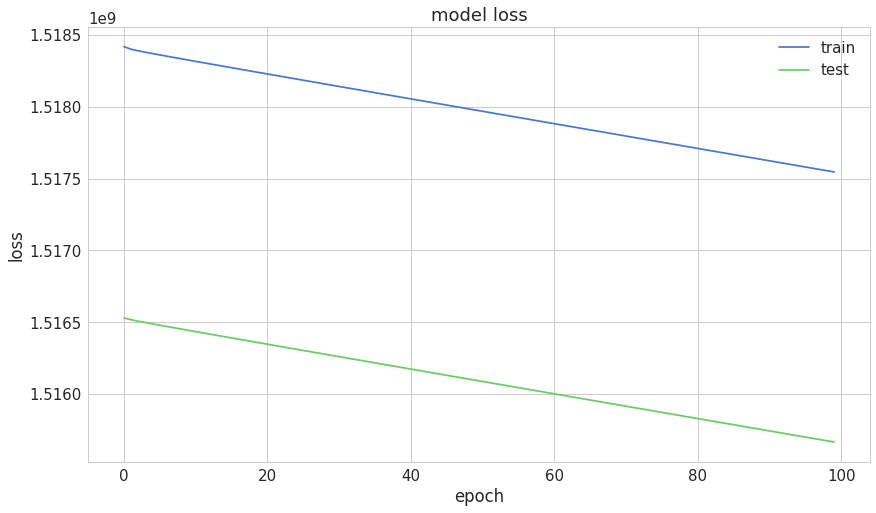

In [20]:

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [21]:
predictions = autoencoder.predict(X_test)

In [22]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

NameError: name 'y_test' is not defined

In [68]:
data.columns[280]
#data.columns[241]

'introducer_sheath_guiding_cathlab_27x'